In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('dados_limpos.csv', encoding='latin1', parse_dates=['DATA'])
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA
0,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,13
1,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,18
2,2016,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1
3,2016,1,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,16
4,2016,1,ACIR GURGACZ,Aquisiçao de material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,1


In [3]:
df.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
DIA                           int64
dtype: object

In [4]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO,DIA
count,26688.000000,26688.000000,26688.000000,26688.000000
mean,2016.022482,6.470736,947.489558,15.430680
std,1.481181,3.257139,2733.963252,8.846572
min,1977.000000,1.000000,0.010000,1.000000
25%,2016.000000,4.000000,123.997500,8.000000
50%,2016.000000,6.000000,324.745000,15.000000
75%,2016.000000,9.000000,956.762500,23.000000
max,2106.000000,12.000000,256980.000000,31.000000


In [5]:
df[df['VALOR_REEMBOLSADO'] == 256980]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA
4637,2017,12,DAVI ALCOLUMBRE,Marketing,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0,22


In [6]:
senadores_com_mais_gastos = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum()
senadores_com_mais_gastos = senadores_com_mais_gastos.sort_values(ascending=False)

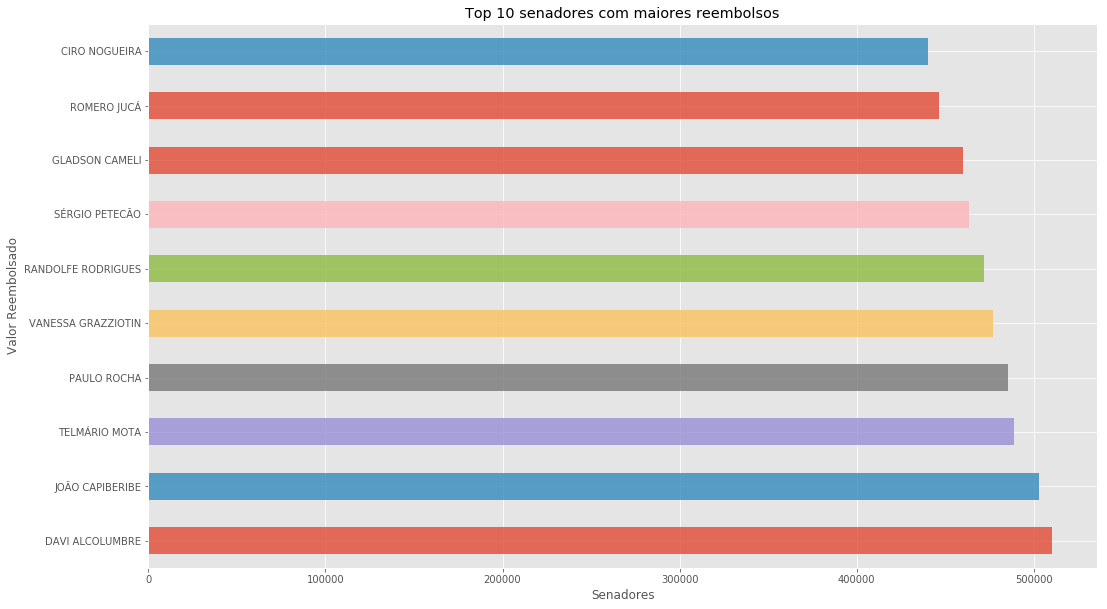

In [7]:
senadores_com_mais_gastos.head(10).plot(kind='barh', alpha=.8, figsize=(17,10))
plt.title('Top 10 senadores com maiores reembolsos')
plt.ylabel('Valor Reembolsado')
plt.xlabel('Senadores')
plt.savefig('top_10_senadores_gastos.png')
plt.show()

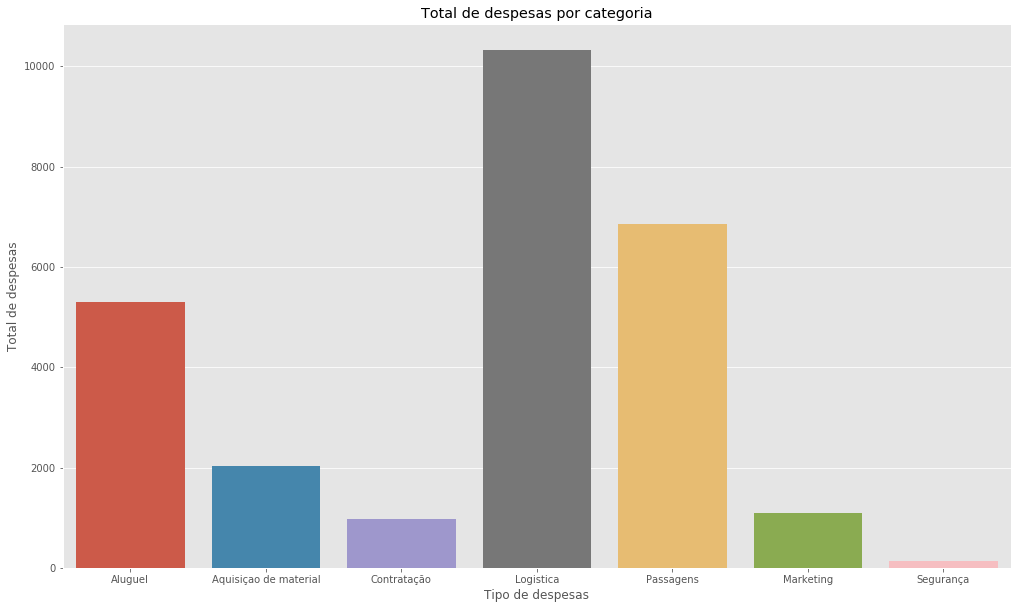

In [8]:
plt.figure(figsize=(17,10))
sns.countplot(x=df['TIPO_DESPESA'])
plt.title('Total de despesas por categoria')
plt.ylabel('Total de despesas')
plt.xlabel('Tipo de despesas')
plt.show()

In [18]:
df['ANO_MES'] = df['DATA'].dt.strftime('%Y-%m')

In [22]:
pivot_df = df.pivot_table(index='ANO_MES',
               columns='TIPO_DESPESA',
               values='VALOR_REEMBOLSADO',
               aggfunc=np.sum,
               fill_value=0)
pivot_df = pivot_df.loc['2016-01':'2016-12']

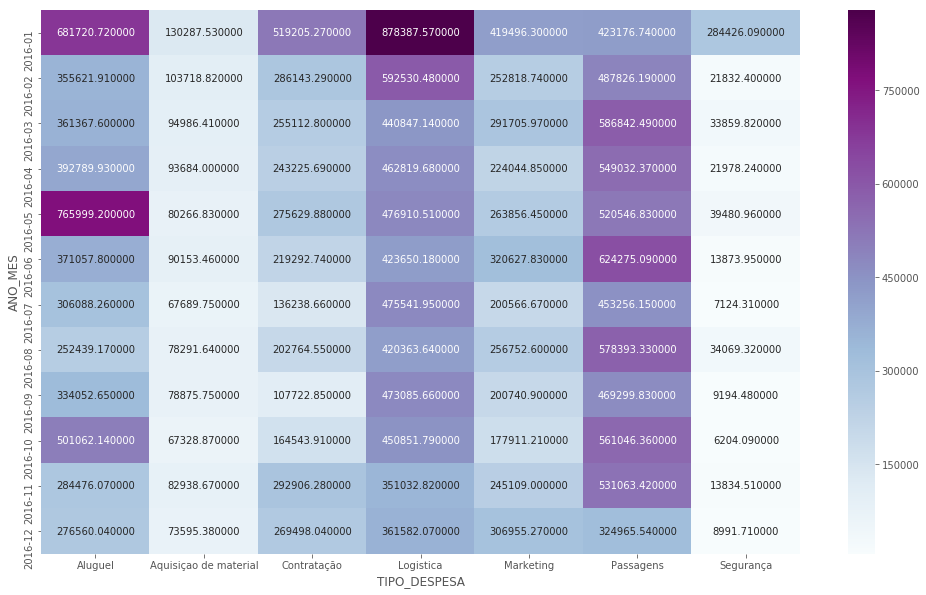

In [24]:
plt.figure(figsize=(17,10))
sns.heatmap(pivot_df, annot=True, fmt='2f', cmap='BuPu')
plt.show()

In [21]:
df.[df['ANO_MES'] == '1977-10']

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,ANO_MES
17926,1977,10,PAULO PAIM,Logistica,37.063.328/0030-00,Auto Shopping Derivados de Petroleo Ltda,621942,1977-10-10,Aquisição de combustível para veículos utiliza...,152.51,10,1977-10
